# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key2

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

In [3]:

url = "http://api.openweathermap.org/data/2.5/weather?lat=0&lon=1&APPID=" + api_key2

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities

['cabo san lucas',
 'chapais',
 'ushuaia',
 'darhan',
 'punta arenas',
 'mataura',
 'bluff',
 'itoman',
 'ilulissat',
 'thompson',
 'hithadhoo',
 'carnarvon',
 'kavaratti',
 'mundo nuevo',
 'marawi',
 'hilo',
 'dali',
 'nikolskoye',
 'busselton',
 'grand river south east',
 'nelson bay',
 'rikitea',
 'dikson',
 'oxford',
 'upernavik',
 'bredasdorp',
 'kristiansund',
 'puerto ayora',
 'nazilli',
 'castro',
 'palmer',
 'khatanga',
 'sainte-rose',
 'narrabri',
 'dauphin',
 'cockburn town',
 'luang prabang',
 'los llanos de aridane',
 'kununurra',
 'albany',
 'pastavy',
 'surovatikha',
 'norman wells',
 'fort nelson',
 'pishin',
 'xuddur',
 'amderma',
 'torbay',
 'feijo',
 'tiksi',
 'barrow',
 'nalut',
 'kruisfontein',
 'pisco',
 'barentsburg',
 'taolanaro',
 'haapiti',
 'kapaa',
 'balkanabat',
 'new norfolk',
 'port alfred',
 'lompoc',
 'chiredzi',
 'illoqqortoormiut',
 'satitoa',
 'atuona',
 'sinnamary',
 'shenzhen',
 'litoral del san juan',
 'saint-augustin',
 'barguzin',
 'provideniya'

In [5]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lon = []
temp_max = []
wind_speed = []
n = 1

print(f"-+-+-+-+-+-+-+-+-+-+-+-+-")
print(f"|~~~~~INITIALIZING~~~~~~|")
print(f"-+-+-+-+-+-+-+-+-+-+-+-+-")

for city in cities:  
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        temp_max.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"City Number {n} | {city_record}")
        print(f"{url}&q={city}")
        
        n += 1
        
        time.sleep(1.1)
        
    except(KeyError, IndexError):
        print(f"-+-+-+-+-+-+-+-+-+-+-+-+-")
        print("|~~ERROR!~~~~Skipping!~~|")
        print(f"-+-+-+-+-+-+-+-+-+-+-+-+-")
    continue
    
print(f"-+-+-+-+-+-+-+-+-+-+-+-+-") 
print(f"|~~~~~~~~~~FIN~~~~~~~~~~|")
print(f"-+-+-+-+-+-+-+-+-+-+-+-+-")

.org/data/2.5/weather?lat=0&lon=1&APPID=4408a64cede17b165dccd46dc1f5c523&q=vinh
City Number 413 | Nguruka
http://api.openweathermap.org/data/2.5/weather?lat=0&lon=1&APPID=4408a64cede17b165dccd46dc1f5c523&q=nguruka
City Number 414 | Sawakin
http://api.openweathermap.org/data/2.5/weather?lat=0&lon=1&APPID=4408a64cede17b165dccd46dc1f5c523&q=sawakin
City Number 415 | Hervey Bay
http://api.openweathermap.org/data/2.5/weather?lat=0&lon=1&APPID=4408a64cede17b165dccd46dc1f5c523&q=hervey bay
City Number 416 | Burns Lake
http://api.openweathermap.org/data/2.5/weather?lat=0&lon=1&APPID=4408a64cede17b165dccd46dc1f5c523&q=burns lake
City Number 417 | Igis
http://api.openweathermap.org/data/2.5/weather?lat=0&lon=1&APPID=4408a64cede17b165dccd46dc1f5c523&q=igis
City Number 418 | Polyarny
http://api.openweathermap.org/data/2.5/weather?lat=0&lon=1&APPID=4408a64cede17b165dccd46dc1f5c523&q=polyarnyy
City Number 419 | Akdepe
http://api.openweathermap.org/data/2.5/weather?lat=0&lon=1&APPID=4408a64cede17b165

In [6]:
data = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity, 
    "Max Temp": temp_max,
    "Wind Speed":wind_speed,
    "Lat":lat, 
    "Long":lon,
}


weather = pd.DataFrame(data)

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
weather.to_csv("weather_data.csv")

In [8]:
weather.head()

,City,Cloudiness,Country,Date,Humidity,Max Temp,Wind Speed,Lat,Long
0,Cabo San Lucas,90,MX,1580536579,63,291.48,2.60,22.89,-109.91
1,Chapais,75,CA,1580536778,84,257.15,2.10,49.78,-74.85
2,Ushuaia,75,AR,1580536102,66,285.15,7.20,-54.80,-68.30
3,Darhan,59,MN,1580536780,91,253.31,1.41,49.49,105.92
4,Punta Arenas,75,CL,1580536394,71,284.15,5.10,-53.15,-70.92


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

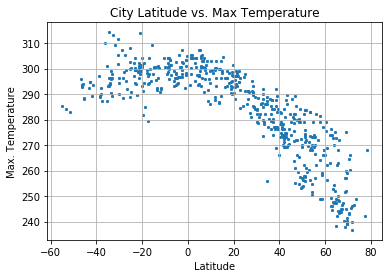

In [9]:
plt.scatter(weather["Lat"], weather["Max Temp"], marker="x", s=5)


plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature")
plt.xlabel("Latitude")
plt.grid(True)
plt.savefig("Max_Temp_vs_Latitude.png")
plt.show()

#### Latitude vs. Humidity Plot

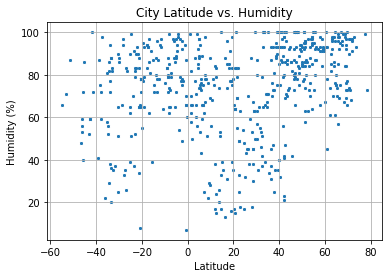

In [10]:
plt.scatter(weather["Lat"], weather["Humidity"], marker="x", s=5)


plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Humidity_vs_Latitude.png")


plt.show()

#### Latitude vs. Cloudiness Plot

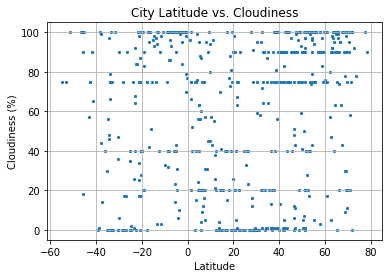

In [11]:
plt.scatter(weather["Lat"], weather["Cloudiness"], marker="x", s=5)
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Cloudiness_vs_Latitude.png")

plt.show()

#### Latitude vs. Wind Speed Plot

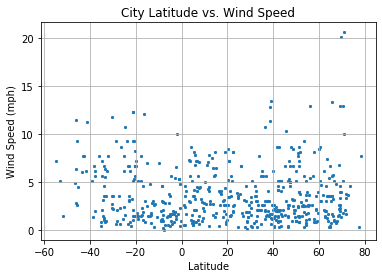

In [12]:
plt.scatter(weather["Lat"], weather["Wind Speed"], marker="x", s=5)


plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Wind_Speed_vs_Latitude.png")

plt.show()